# Sections around the ACC

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.path import Path
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs

import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import processing_funcs as prf

In [21]:
reload(ef);

The goal of this notebook is to take multiple sections in the Southern Ocean to see if this variance minimum appears anywhere else. I'd also like to try doing one huge section from the Southern Ocean to the North Atlantic if possible.

# Section Selection

In [72]:
box1 = [0,2,-70,0,0,2000]
box2 = [60,62,-70,20,0,2000]
box3 = [90,92,-70,15,0,2000]
box4 = [130,132,-70,-35,0,2000]
box5 = [-180,-178,-70,70,0,2000]
box6 = [-130,-128,-70,50,0,2000]
box7 = [-50,-48,-70,-35,0,2000]
box8 = [-25,-23,-70,70,0,2000]
boxes= [box1, box2, box3, box4, box5, box6, box7, box8]

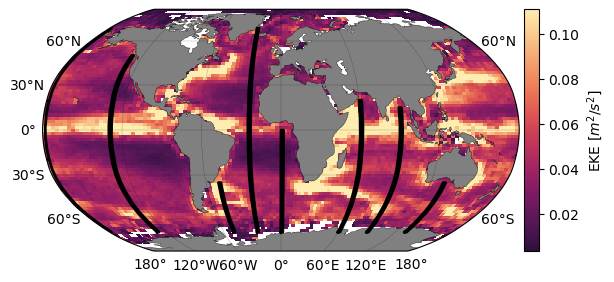

In [73]:
pf.plot_box(boxes)

In [30]:
sect1     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(0,2)_lat:(-70,0)_ds_z.nc')
sect1_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(0,2)_lat:(-70,0)_ls:[50,100,200]_SPICE.nc')

In [49]:
sect2     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(60,62)_lat:(-70,20)_ds_z.nc')
sect2_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(60,62)_lat:(-70,20)_ls:[50,100,200]_SPICE.nc')

In [52]:
sect3     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(90,92)_lat:(-70,15)_ds_z.nc')
sect3_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(90,92)_lat:(-70,15)_ls:[50,100,200]_SPICE.nc')

In [59]:
sect4     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(130,132)_lat:(-70,-35)_ds_z.nc')
sect4_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(130,132)_lat:(-70,-35)_ls:[50,100,200]_SPICE.nc')

In [ ]:
sect5     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(180,182)_lat:(-70,70)_ds_z.nc')
sect5_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(180,182)_lat:(-70,70)_ls:[50,100,200]_SPICE.nc')

In [82]:
sect6     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(240,242)_lat:(-70,30)_ds_z.nc')
sect6_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(240,242)_lat:(-70,30)_ls:[50,100,200]_SPICE.nc')

FileNotFoundError: [Errno 2] No such file or directory: '/swot/SUM05/amf2288/sync-boxes/lon:(240,242)_lat:(-70,30)_ds_z.nc'

In [ ]:
sect7     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(310,310)_lat:(-70,-35)_ds_z.nc')
sect7_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(310,310)_lat:(-70,-35)_ls:[50,100,200]_SPICE.nc')

In [ ]:
sect8     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(335,337)_lat:(-70,70)_ds_z.nc')
sect8_EKE = xr.open_dataset('/swot/SUM05/amf2288/EKE-boxes/lon:(335,337)_lat:(-70,70)_ls:[50,100,200]_SPICE.nc')

In [74]:
sect6 = prf.get_box(box6)

loading points complete


/home/amf2288/mambaforge-pypy3/envs/argo_Aug_23/lib/python3.10/site-packages/argopy/data_fetchers/gdacftp_data.py:316: UserWarning: Found more than 50 files to load, this may take a while to process sequentially ! Consider using another data source (eg: 'erddap') or the 'parallel=True' option to improve processing time.
  warnings.warn(
 27%|██▋       | 317/1173 [13:51<46:31,  3.26s/it]

Oops! <class 'UnicodeDecodeError'> occurred.
Fail to cast SCIENTIFIC_CALIB_COEFFICIENT[('N_PROF', 'N_CALIB', 'N_PARAM')] from 'object' to <class 'str'>
Unique values: [b'                                                                                                                                                                                                                                                                '
 b'ADDITIVE COEFFICIENT FOR PRESSURE ADJUSTMENT IS -6.3db                                                                                                                                                                                                          '
 b'ADDITIVE COEFFICIENT FOR PRESSURE ADJUSTMENT IS -6.4db                                                                                                                                                                                                          '
 b'ADDITIVE COEFFICIENT FOR PRESSURE ADJUSTMENT IS

 53%|█████▎    | 620/1173 [28:39<26:00,  2.82s/it]

Oops! <class 'UnicodeDecodeError'> occurred.
Fail to cast SCIENTIFIC_CALIB_COEFFICIENT[('N_PROF', 'N_CALIB', 'N_PARAM')] from 'object' to <class 'str'>
Unique values: [b'                                                                                                                                                                                                                                                                '
 b'ADDITIVE COEFFICIENT FOR PRESSURE ADJUSTMENT IS -0.01db                                                                                                                                                                                                         '
 b'ADDITIVE COEFFICIENT FOR PRESSURE ADJUSTMENT IS -0.02db                                                                                                                                                                                                         '
 b'ADDITIVE COEFFICIENT FOR PRESSURE ADJUSTMENT IS

 61%|██████    | 714/1173 [33:19<24:27,  3.20s/it]

Oops! <class 'UnicodeDecodeError'> occurred.
Fail to cast SCIENTIFIC_CALIB_COEFFICIENT[('N_PROF', 'N_CALIB', 'N_PARAM')] from 'object' to <class 'str'>
Unique values: [b'                                                                                                                                                                                                                                                                '
 b'5.4                                                                                                                                                                                                                                                             '
 b'5.6                                                                                                                                                                                                                                                             '
 b'5.7                                            

 83%|████████▎ | 977/1173 [46:48<09:22,  2.87s/it]

Oops! <class 'UnicodeDecodeError'> occurred.
Fail to cast SCIENTIFIC_CALIB_COEFFICIENT[('N_PROF', 'N_CALIB', 'N_PARAM')] from 'object' to <class 'str'>
Unique values: [b'                                                                                                                                                                                                                                                                '
 b'5.3                                                                                                                                                                                                                                                             '
 b'5.4                                                                                                                                                                                                                                                             '
 b'5.5                                            

 85%|████████▍ | 997/1173 [48:05<10:40,  3.64s/it]

Oops! <class 'UnicodeDecodeError'> occurred.
Fail to cast SCIENTIFIC_CALIB_COEFFICIENT[('N_PROF', 'N_CALIB', 'N_PARAM')] from 'object' to <class 'str'>
Unique values: [b'                                                                                                                                                                                                                                                                '
 b'ADDITIVE COEFFICIENT FOR PRESSURE ADJUSTMENT IS -0.3db                                                                                                                                                                                                          '
 b'ADDITIVE COEFFICIENT FOR PRESSURE ADJUSTMENT IS 0db                                                                                                                                                                                                             '
 b'CONDUCTIVITY WAS NOT ADJUSTED. COEFFICIENT r FO

100%|██████████| 1173/1173 [57:02<00:00,  2.92s/it]


to xarray complete
point to profile complete
interpolation complete
adding spice complete
adding MLD complete


In [75]:
sect6 = sect6.assign_attrs({"Fetched_uri":''})
sect6

<xarray.Dataset>
Dimensions:            (N_PROF: 4137, PRES_INTERPOLATED: 1000)
Coordinates:
  * N_PROF             (N_PROF) int64 18 19 20 21 22 ... 14905 1577 12516 13060
    TIME               (N_PROF) datetime64[ns] 2000-11-14T01:28:39 ... 2023-0...
    LATITUDE           (N_PROF) float64 -12.1 -12.21 -12.35 ... 5.988 -21.83
    LONGITUDE          (N_PROF) float64 -129.8 -129.5 -129.3 ... -128.7 -128.8
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 2 4 6 ... 1992 1994 1996 1998
    N_PROF_NEW         (N_PROF) int64 0 1 2 3 4 5 ... 4132 4133 4134 4135 4136
    MLD                (N_PROF) int64 24 16 50 30 4 58 ... 126 22 126 48 22 150
    month              (N_PROF) int64 11 11 12 12 12 1 2 2 3 ... 7 7 7 7 7 8 8 8
    month_frac         (N_PROF) float64 11.47 11.83 12.18 ... 8.041 8.055 8.1
    year               (N_PROF) int64 2000 2000 2000 2000 ... 2023 2023 2023
    year_frac          (N_PROF) float64 2.001e+03 2.001e+03 ... 2.024e+03
Data variables:
    CT                 (N_PROF, PRES_INTERPOLATED) float64 26.46 26.46 ... 1.981
    CYCLE_NUMBER       (N_PROF) int64 1 2 3 4 5 7 9 ... 137 134 23 25 65 253 211
    DATA_MODE          (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'A' 'R' 'A' 'A' 'R'
    DIRECTION          (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) int64 39035 39035 39035 ... 5904783 5905257
    PRES               (N_PROF, PRES_INTERPOLATED) float32 4.3 4.3 ... 1.998e+03
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 35.69 35.69 ... 34.64
    SA                 (N_PROF, PRES_INTERPOLATED) float64 35.86 35.86 ... 34.82
    SIG0               (N_PROF, PRES_INTERPOLATED) float64 23.4 23.4 ... 27.7
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 26.48 26.48 ... 2.119
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 5.2 5.2 ... 2.0 2.0
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 5.874 ... -0.09455
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2023/08/24
    Fetched_constraints:  [x=-130.00/-128.00; y=-70.00/50.00; z=0.0/2000.0]
    Fetched_uri:          
    history:              Variables filtered according to DATA_MODE; Variable...

In [79]:
sect6.to_netcdf('/swot/SUM05/amf2288/sync-boxes/lon:({},{})_lat:({},{})_ds_z.nc'.format(box6[0],box6[1],box6[2],box6[3]))

In [11]:
scales     = [50,100,200]
sample_max = 6
variable   = 'SPICE'

In [76]:
sect6_EKE = ef.get_EKE_da(sect6,scales,sample_max,variable)

In [77]:
sect6_EKE

<xarray.DataArray (EKE: 3, N_PROF: 2520, PRES_INTERPOLATED: 1000)>
array([[[1.09359867e-03, 1.73116218e-03, 2.68571088e-03, ...,
         9.55053204e-08, 8.94189924e-08, 8.27692426e-08],
        [3.04575026e-04, 4.86776139e-04, 7.62392680e-04, ...,
         6.92361497e-08, 6.14504031e-08, 5.37437326e-08],
        [1.88733259e-03, 2.86332201e-03, 4.26532346e-03, ...,
         6.73487155e-08, 6.20412650e-08, 5.61900665e-08],
        ...,
        [2.70795667e-06, 2.84383260e-06, 2.92079034e-06, ...,
         3.15684752e-08, 2.86503164e-08, 2.55730773e-08],
        [1.59513055e-06, 2.81468542e-06, 5.22441816e-06, ...,
         1.83541862e-06, 1.72271351e-06, 1.58084094e-06],
        [4.40925891e-07, 4.82650847e-07, 5.19907221e-07, ...,
         6.44246666e-08, 5.44787112e-08, 4.52352013e-08]],

       [[7.21816402e-02, 8.17031173e-02, 9.18263265e-02, ...,
         1.77255045e-07, 1.65508389e-07, 1.54688528e-07],
        [2.84833692e-02, 3.25668393e-02, 3.70011141e-02, ...,
         1.07967313e-07, 1.02499754e-07, 9.73835290e-08],
        [7.81503518e-02, 8.77277840e-02, 9.77309961e-02, ...,
         9.46096304e-08, 8.93624819e-08, 8.48593766e-08],
...
        [8.26115986e-07, 7.46150519e-07, 7.04261936e-07, ...,
         4.04859185e-08, 3.94323666e-08, 3.85058458e-08],
        [2.92814477e-02, 3.57285572e-02, 4.33915562e-02, ...,
         9.88885815e-07, 1.00823162e-06, 1.04695053e-06],
        [3.13436498e-07, 3.78845176e-07, 4.67390134e-07, ...,
         7.72553171e-08, 7.91267686e-08, 8.00927426e-08]],

       [[1.61365371e-01, 1.58673644e-01, 1.54918106e-01, ...,
         5.28209208e-07, 5.21480047e-07, 5.14247045e-07],
        [9.69867190e-02, 9.72698395e-02, 9.70682430e-02, ...,
         2.79531205e-07, 2.79316895e-07, 2.78512595e-07],
        [1.56353234e-01, 1.52847196e-01, 1.48311199e-01, ...,
         2.73225389e-07, 2.71181944e-07, 2.68798603e-07],
        ...,
        [2.20576487e-03, 2.45075832e-03, 2.71972610e-03, ...,
         1.84324071e-07, 1.78011576e-07, 1.71957099e-07],
        [7.57390068e-01, 7.98930674e-01, 8.41034745e-01, ...,
         3.05442893e-06, 2.99482824e-06, 2.94396892e-06],
        [1.79148593e-03, 2.00552724e-03, 2.24219905e-03, ...,
         8.85362784e-08, 9.17981001e-08, 9.51025702e-08]]])
Coordinates:
  * N_PROF             (N_PROF) int64 6606 6712 6607 9855 ... 14905 1577 13060
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 2 4 6 ... 1992 1994 1996 1998
    LATITUDE           (N_PROF) float64 48.45 47.92 48.45 ... -2.314 -21.83
    LONGITUDE          (N_PROF) float64 -128.7 -128.8 -128.7 ... -128.6 -128.8
    MLD                (N_PROF) int64 40 14 32 10 26 10 ... 152 126 126 48 150
    month              (N_PROF) int64 9 9 9 8 9 10 11 12 1 ... 7 7 7 7 7 7 7 8 8
    month_frac         (N_PROF) float64 9.594 9.603 9.621 ... 8.026 8.041 8.1
    year               (N_PROF) int64 2005 2005 2005 2010 ... 2023 2023 2023
    year_frac          (N_PROF) float64 2.006e+03 2.006e+03 ... 2.024e+03
    TIME               (N_PROF) datetime64[ns] 2005-09-17T19:54:41.000000256 ...
    mask               (N_PROF, PRES_INTERPOLATED) float64 0.0 0.0 ... 0.0 0.0
Dimensions without coordinates: EKE

In [80]:
sect6_EKE.to_netcdf('/swot/SUM05/amf2288/EKE-boxes/lon:({},{})_lat:({},{})_ls:[{},{},{}]_SPICE.nc'.format(box6[0],box6[1],box6[2],box6[3],scales[0],scales[1],scales[2]))

In [ ]:
def postobox(lon, lat):
    '''Takes a longitude and latitude pair and returns a box containing these values.
    '''
    y_box = [lat[0], lat[0], lat[1], lat[1], lat[0]]
    x_box = [lon[0], lon[1], lon[1], lon[0], lon[0]]

# Discrete T, S, SIG0 Sections

# EKE Sections